In [43]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
def gen(power, iterations):
    acc = []
    for i in range(1, iterations):
        acc.append(1/pow(i, power))
    return acc

In [15]:
gen(1, 10)

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111]

In [16]:
def summarize(power, iterations):
    nums = gen(power, iterations)
    print(nums)
    print(sum(nums))

In [17]:
summarize(.5, 10)

[1.0, 0.7071067811865475, 0.5773502691896258, 0.5, 0.4472135954999579, 0.4082482904638631, 0.3779644730092272, 0.35355339059327373, 0.3333333333333333]
4.7047701332758285


In [18]:
sum(gen(.5, 1000))

61.769385988641496

In [31]:
def table_data(power, max_iterations, iteration_step=1):
    iterations = []
    sums = []
    for i in range(1, max_iterations, iteration_step):
        iterations.append(i)
        sums.append(sum(gen(power, i)))
    return {
        "iterations": iterations, 
        "sums": sums
    }

In [26]:
table_data(1, 10)

{'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'sums': [0,
  0,
  1.0,
  1.5,
  1.8333333333333333,
  2.083333333333333,
  2.283333333333333,
  2.4499999999999997,
  2.5928571428571425,
  2.7178571428571425]}

In [29]:
def line_plot(power, max_iterations, iteration_step=1):
    data = table_data(power, max_iterations, iteration_step)
    plt.plot(data["iterations"], data["sums"], color='green', marker='o', linestyle='solid')
    
    plt.title(f"Power of {power} up to {max_iterations}")
    
    plt.show()

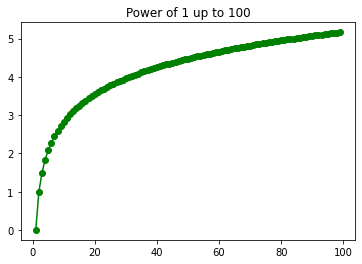

In [33]:
line_plot(1, 100)

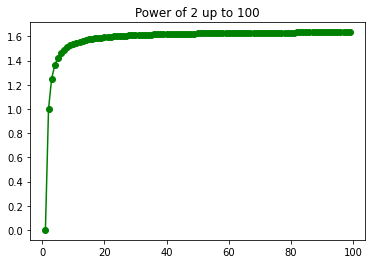

In [34]:
line_plot(2, 100)

In [38]:
dic = {
    "test": True
}

dic["working"] = "yes"

dic

{'test': True, 'working': 'yes'}

In [53]:
def multi_data(minPower, maxPower, powerStep, max_iteration, iteration_step=1):
    iterations = []
    sums = {}
    for power in np.arange(minPower, maxPower + powerStep, powerStep):
        # Fixes floating point issue
        rounded = round(power, 8)
        sums[rounded] = []
    for i in range(1, max_iteration, iteration_step):
        iterations.append(i)
        for power in sums.keys():
            sums[power].append(sum(gen(power, i)))
    return {
        "iterations": iterations,
        "sums_by_power": sums
    }

In [54]:
multi_data(.8, 2, .2, 5)

{'iterations': [1, 2, 3, 4],
 'sums_by_power': {0.8: [0, 1.0, 1.5743491774985174, 1.989592824037023],
  1.0: [0, 1.0, 1.5, 1.8333333333333333],
  1.2: [0, 1.0, 1.435275281648062, 1.7028558022348057],
  1.4: [0, 1.0, 1.3789291416275995, 1.5937271466200176],
  1.6: [0, 1.0, 1.3298769776932235, 1.502304263683819],
  1.8: [0, 1.0, 1.2871745887492587, 1.4255891375954273],
  2.0: [0, 1.0, 1.25, 1.3611111111111112]}}

In [128]:
def multi_plot(minPower, maxPower, powerStep, max_iterations, iteration_step=1, include_cutoff=False):
    data = multi_data(minPower, maxPower, powerStep, max_iterations, iteration_step)
    for power, sums in data["sums_by_power"].items():
        rgb_tuple = (0, 148 / 255, min((power - minPower) / (maxPower - minPower), 1))
        plt.plot(data["iterations"], sums, color=rgb_tuple, linestyle='solid')
    
    actualMin = list(data["sums_by_power"].keys())[0]
    actualMax = list(data["sums_by_power"].keys())[-1]
    
    if (include_cutoff):
        data = table_data(1, max_iterations, iteration_step)
        plt.plot(data["iterations"], data["sums"], color='black', linestyle='solid')
    
    plt.title(f"Powers from {actualMin} to {actualMax}, at {max_iterations} iterations")
    plt.show

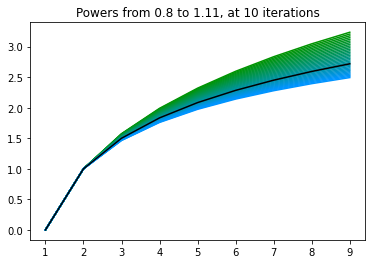

In [129]:
multi_plot(.8, 1.1, .01, 10, include_cutoff=True)

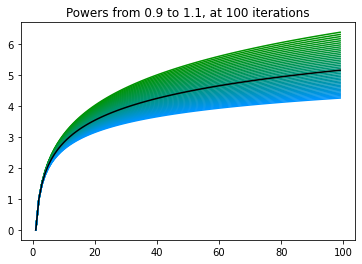

In [134]:
multi_plot(.9, 1.1, .005, 100, include_cutoff=True)